In [1]:
import DQN_components as agent_factory
from DQN_components.plotter import plot_trend
import enviroment

2024-10-21 12:23:24.627796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 12:23:24.825564: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 12:23:25.096253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 12:23:25.309909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 12:23:25.358328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 12:23:25.737345: I tensorflow/core/platform/cpu_feature_gu

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# DQN Training
Il notebook si divide in due sezioni: la prima con una rappresentazione di stato semplice, la seconda più complessa. \\\
Ciascun allenamento prevede l'impiego di una diversa tecnica RL in modo che il confronto tra di esse sia semplice.

# Rappresentazione di stato semplice con soli 11 valori

In [2]:
env = enviroment.LinearStateSnakeGame(visual=False)

Game: 500, Epsilon: 0.000000, Score: 9, Record: 51, Step eseguiti: 89359.  

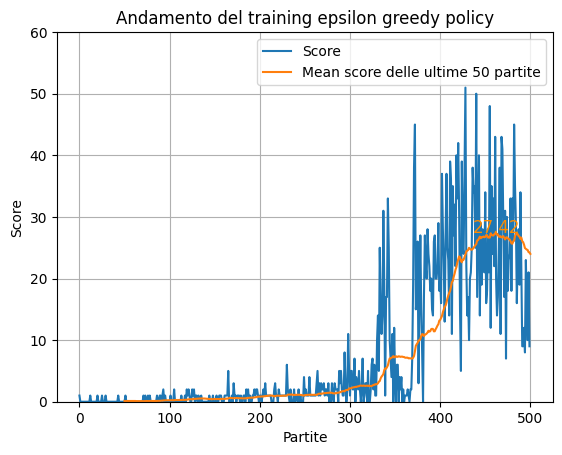

In [3]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_base_eps.keras")
plot_trend(train_result, extra_title="epsilon greedy policy")

Game: 500, Epsilon: 0.000000, Score: 29, Record: 58, Step eseguiti: 149926. 

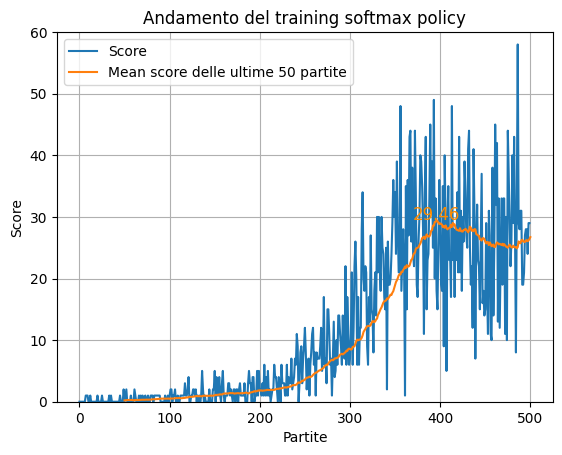

In [4]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, eps_greedy=False,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_base_sftmx.keras")
plot_trend(train_result, extra_title="softmax policy")

Game: 500, Epsilon: 0.000000, Score: 46, Record: 51, Step eseguiti: 96275. 

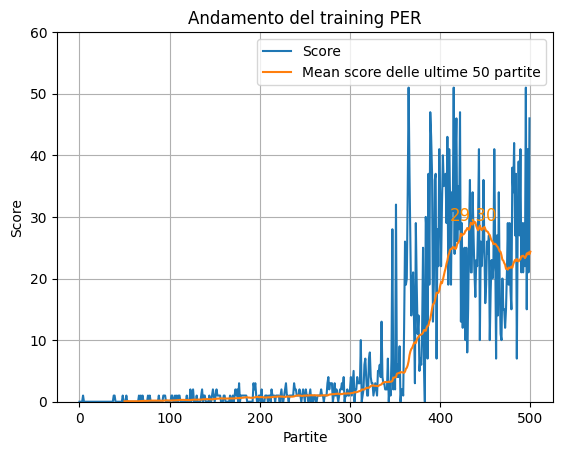

In [4]:
agent_per = agent_factory.Agent_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_per = agent_per.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_PER.keras")
plot_trend(train_result_per, extra_title="PER")

Game: 500, Epsilon: 0.000000, Score: 18, Record: 51, Step eseguiti: 85307. 

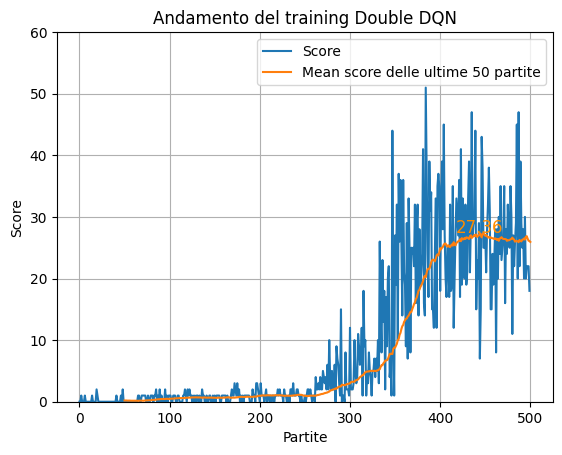

In [4]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_DDQN.keras")
plot_trend(train_result, extra_title="Double DQN")

Game: 500, Epsilon: 0.000000, Score: 29, Record: 49, Step eseguiti: 89428. 

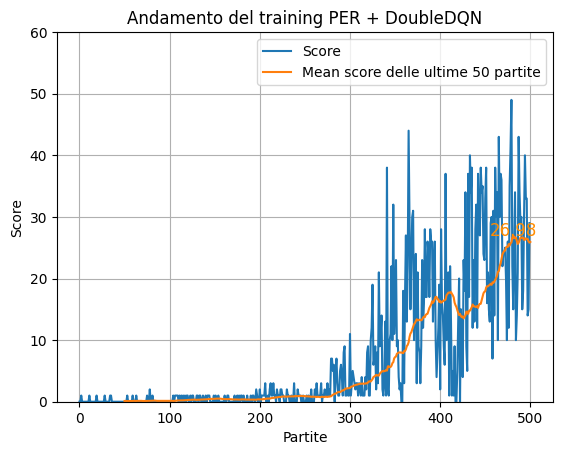

In [6]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_PER_DDQN.keras")
plot_trend(train_result, extra_title="PER + DoubleDQN")

# Rappresentazione di stato più complessa: una matrice 7x7 al cui centro la testa di snake.

In [3]:
env = enviroment.MatrixStateSnakeGame(visual=False)

Game: 700, Epsilon: 0.000000, Score: 42, Record: 72, Step eseguiti: 197032. 

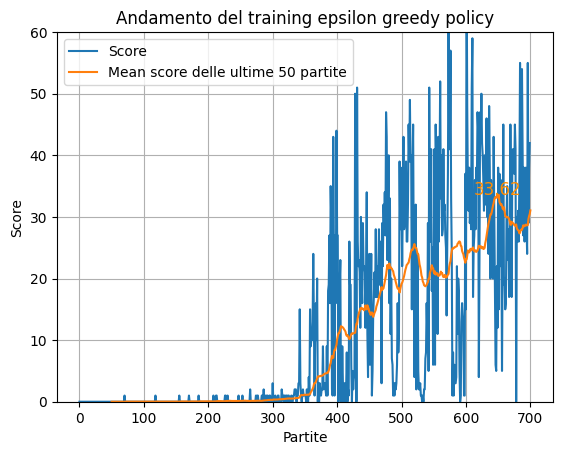

In [3]:
agent = agent_factory.Agent(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, eps_greedy=True, 
                                 directory_path="./DQN_saved_model/matrix_state/", file_name_model="model_eps.keras")
plot_trend(train_result, extra_title="epsilon greedy policy")

Game: 700, Epsilon: 0.000000, Score: 30, Record: 57, Step eseguiti: 277224. 

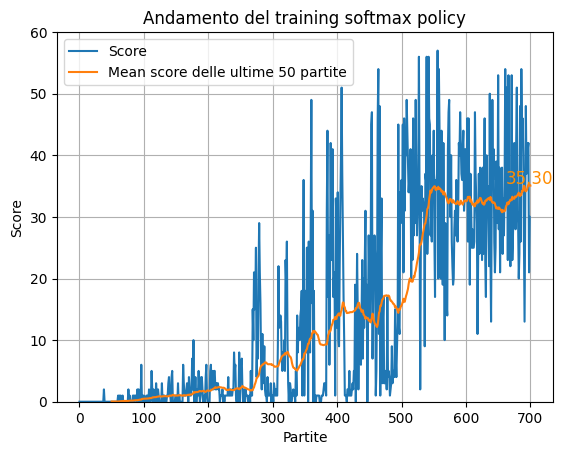

In [10]:
agent = agent_factory.Agent(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, eps_greedy=False, 
                                 directory_path="./DQN_saved_model/matrix_state/", file_name_model="model_sftmx.keras")
plot_trend(train_result, extra_title="softmax policy")

Game: 700, Epsilon: 0.000000, Score: 21, Record: 57, Step eseguiti: 146612. 

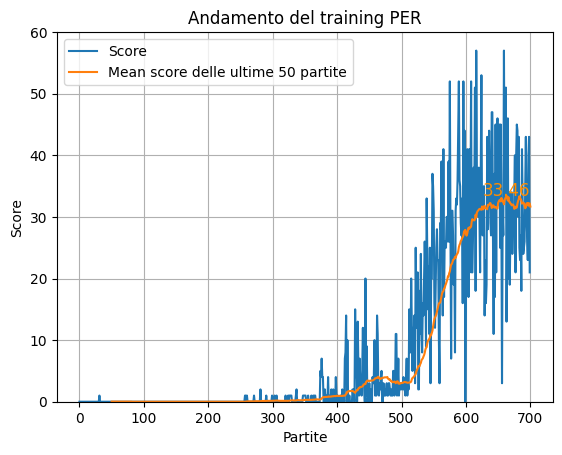

In [6]:
agent = agent_factory.Agent_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, eps_greedy=True, 
                                 directory_path="./DQN_saved_model/matrix_state/", file_name_model="model_PER.keras")
plot_trend(train_result, extra_title="PER")

Game: 700, Epsilon: 0.000000, Score: 50, Record: 71, Step eseguiti: 211791. 

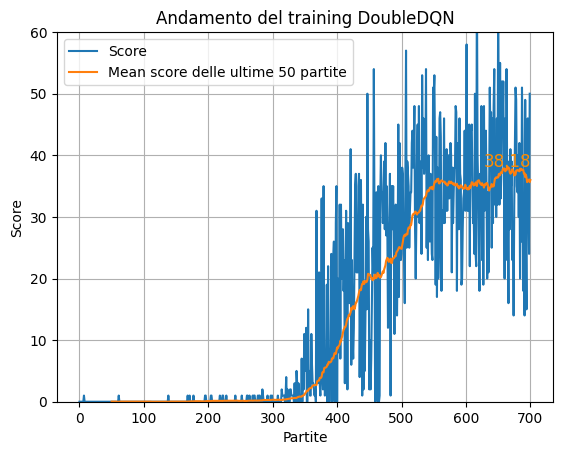

In [6]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, eps_greedy=True, 
                                 directory_path="./DQN_saved_model/matrix_state/", file_name_model="model_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Game: 700, Epsilon: 0.000000, Score: 37, Record: 69, Step eseguiti: 169881. 

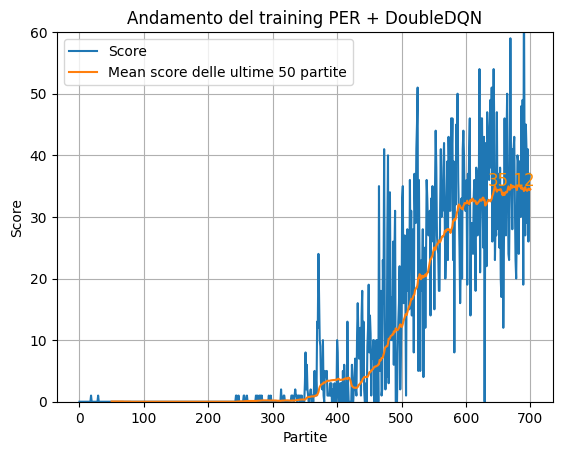

In [7]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, eps_greedy=True,
                                 directory_path="./DQN_saved_model/matrix_state/", 
                                 file_name_model="model_PER_DDQN_eps.keras")
plot_trend(train_result, extra_title="PER + DoubleDQN")

Continua l'allenamento fino a convergenza del'agente più promettente, DoubleDQN.

In [4]:
env = enviroment.MatrixStateSnakeGame(visual=False)

In [5]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4)
agent.dqnetwork.upload_model("./DQN_saved_model/matrix_state/model_DDQN.keras")
train_result = agent.train_agent(N_GAME=300, episode_decay=0, eps_greedy=True, 
                                 directory_path="./DQN_saved_model/matrix_state/", 
                                 file_name_model="model_DDQN_v2.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Modello caricato con successo da './DQN_saved_model/matrix_state/model_DDQN.keras'
Game: 15, Epsilon: 0.000000, Score: 41, Record: 61, Step eseguiti: 8541. 

KeyboardInterrupt: 

: 